In [2]:
from keras.datasets import mnist
(train_feature, train_label), (test_feature, test_label) = mnist.load_data()
print(len(train_feature), len(train_label))
print(train_feature.shape, train_label.shape)

11501568/11490434 [==============================] - 0s 0us/step
60000 60000
(60000, 28, 28) (60000,)


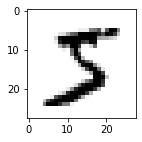

5


In [4]:
import matplotlib.pyplot as plt
def show_image(image):
  fig = plt.gcf()
  fig.set_size_inches(2, 2)
  plt.imshow(image, cmap = "binary")
  plt.show()
show_image(train_feature[0])
print(train_label[0])

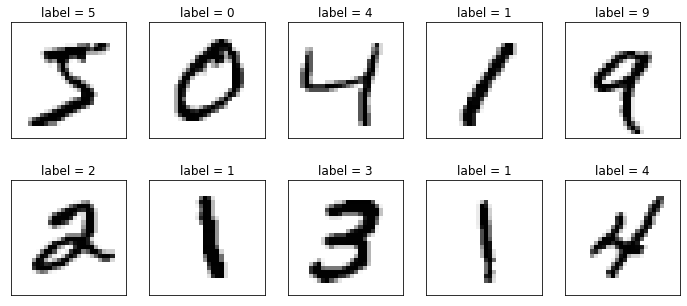

In [9]:
def show_images_labels_predictions(images, labels, predictions, start_id, num = 10):
  plt.gcf().set_size_inches(12, 14)
  if num > 25:
    num = 25
  for i in range(num):
    ax = plt.subplot(5, 5, i + 1)
    ax.imshow(images[start_id], cmap = "binary")

    if (len(predictions) > 0):
      title = "ai = " + str(predictions[start_id])
      title += ("(o)" if predictions[start_id] == labels[start_id] else "(x)")
      title += "\nlabel = " + str(labels[start_id])
    else:
      title = "label = " + str(labels[start_id])

    ax.set_title(title, fontsize = 12)
    ax.set_xticks([])
    ax.set_yticks([])
    start_id += 1
  plt.show()
show_images_labels_predictions(train_feature, train_label, [], 0, 10)

In [10]:
# convert the two-dimension pictures into one-dimension vector
train_feature_vector = train_feature.reshape(len(train_feature), 784).astype("float32")
test_feature_vector = test_feature.reshape(len(test_feature), 784).astype("float32")

# normalize the vectors
train_feature_normalize = train_feature_vector / 255
test_feature_normalize = test_feature_vector / 255

# changes labels into One-hot encoding(one efficient code)
from keras.utils import np_utils
print(train_label[0:5])
train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)
print(train_label_onehot[0:5])

[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# Keras Mnist MLP

Load model parameters failed, keep training model.
Epoch 1/10
240/240 - 1s - loss: 0.4931 - accuracy: 0.8571 - val_loss: 0.1853 - val_accuracy: 0.9487 - 1s/epoch - 5ms/step
Epoch 2/10
240/240 - 1s - loss: 0.1918 - accuracy: 0.9430 - val_loss: 0.1284 - val_accuracy: 0.9628 - 735ms/epoch - 3ms/step
Epoch 3/10
240/240 - 1s - loss: 0.1364 - accuracy: 0.9592 - val_loss: 0.1090 - val_accuracy: 0.9684 - 667ms/epoch - 3ms/step
Epoch 4/10
240/240 - 1s - loss: 0.1074 - accuracy: 0.9671 - val_loss: 0.0914 - val_accuracy: 0.9716 - 688ms/epoch - 3ms/step
Epoch 5/10
240/240 - 1s - loss: 0.0868 - accuracy: 0.9735 - val_loss: 0.0891 - val_accuracy: 0.9739 - 664ms/epoch - 3ms/step
Epoch 6/10
240/240 - 1s - loss: 0.0736 - accuracy: 0.9776 - val_loss: 0.0795 - val_accuracy: 0.9753 - 698ms/epoch - 3ms/step
Epoch 7/10
240/240 - 1s - loss: 0.0616 - accuracy: 0.9814 - val_loss: 0.0777 - val_accuracy: 0.9768 - 692ms/epoch - 3ms/step
Epoch 8/10
240/240 - 1s - loss: 0.0545 - accuracy: 0.9824 - val_loss: 0.0789 

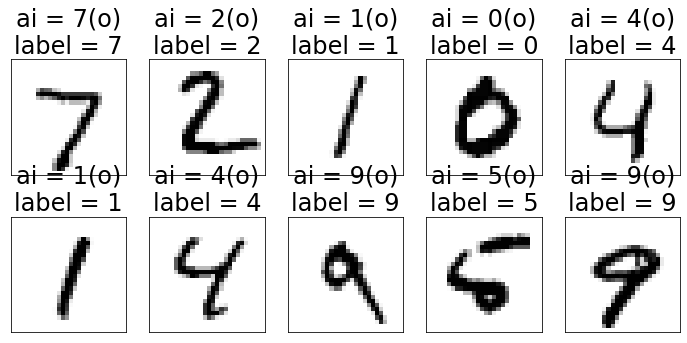

Mnist_mlp_model have been stored.
Model parameters stored.


In [7]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from keras.layers import Dropout

def show_images_labels_predictions(images, labels, predictions, start_id, num = 10):
  plt.gcf().set_size_inches(12, 14)
  if num > 25:
    num = 25
  for i in range(0, num):
    ax = plt.subplot(5, 5, i + 1)
    ax.imshow(images[start_id], cmap = "binary")
    if (len(predictions)) > 0:
      title = "ai = " + str(prediction[start_id])
      title += ("(o)" if predictions[start_id] == labels[start_id] else "(x)")
      title += "\nlabel = " + str(labels[start_id])
    else:
      title = "label = " + str(labels[start_id])
    ax.set_title(title, fontsize = 24)
    ax.set_xticks([])
    ax.set_yticks([])
    start_id += 1
  plt.show()

# import data
(train_feature, train_label), (test_feature, test_label) = mnist.load_data()

# covert two-dimension pictures into one-dimension vectors
train_feature_vector = train_feature.reshape(len(train_feature), 784).astype("float32") # 784 is the pixel of a picture
test_feature_vector = test_feature.reshape(len(test_feature), 784).astype("float32")

# normalize the vectors
train_feature_normalize = train_feature_vector / 255
test_feature_normalize = test_feature_vector / 255

# covert label into one-hot code
train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

# construct model
model = Sequential()
# construct input layer and first hidden layer
model.add(Dense(units = 256, input_dim = 784, kernel_initializer = "normal", activation = "relu"))
# construct dropout to keep from overfitting
model.add(Dropout(0.2))
# construct second hidden layer
model.add(Dense(units = 128, kernel_initializer = "normal", activation = "relu"))
model.add(Dropout(0.2))
# construct output layer
model.add(Dense(units = 10, kernel_initializer = "normal", activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])


# load parameters
try:
  model.load_weights("Mnist_mlp_model_2.weight")
  print("Load model parameters success, keep training model.")
except:
  print("Load model parameters failed, keep training model.")

# training model(training data keep 20% to verify, train 10 times, every time load 200 information, show brief training process)
train_history = model.fit(x = train_feature_normalize, y = train_label_onehot, validation_split = 0.2, epochs = 10, batch_size = 200, verbose = 2)

# evaluate model
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print("Accuracy = ", scores[1])

# do pridiction on test datas
prediction = model.predict(test_feature_normalize)
prediction = np.argmax(prediction, axis = 1)
show_images_labels_predictions(test_feature, test_label, prediction, 0)

# save model
model.save("Mnist_mlp_model.h5")
print("Mnist_mlp_model have been stored.")
model.save_weights("Mnist_mlp_model_2.weight")
print("Model parameters stored.")

del model

# Use existed model to do prediction

Loading model 'Mnist_mlp_model.h5'


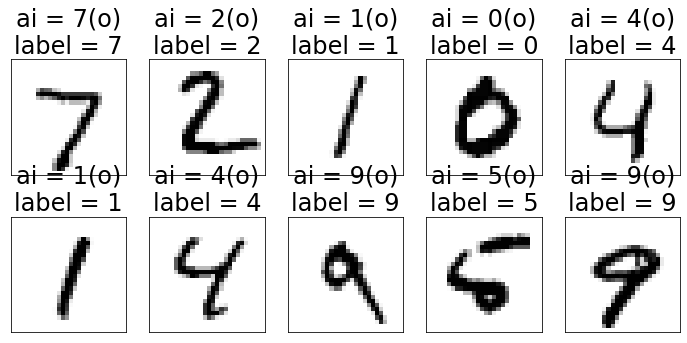

In [6]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from keras.models import load_model

def show_images_labels_predictions(images, labels, predictions, start_id, num = 10):
  plt.gcf().set_size_inches(12, 14)
  if num > 25:
    num = 25
  for i in range(0, num):
    ax = plt.subplot(5, 5, i + 1)
    ax.imshow(images[start_id], cmap = "binary")
    if (len(predictions)) > 0:
      title = "ai = " + str(prediction[start_id])
      title += ("(o)" if predictions[start_id] == labels[start_id] else "(x)")
      title += "\nlabel = " + str(labels[start_id])
    else:
      title = "label = " + str(labels[start_id])
    ax.set_title(title, fontsize = 24)
    ax.set_xticks([])
    ax.set_yticks([])
    start_id += 1
  plt.show()

# import data
(train_feature, train_label), (test_feature, test_label) = mnist.load_data()

# normalize the test data
test_feature_normalize = test_feature_vector / 255

# load existed model
print("Loading model 'Mnist_mlp_model.h5'")
model = load_model("Mnist_mlp_model.h5")

# do pridiction on test datas
prediction = model.predict(test_feature_normalize)
prediction = np.argmax(prediction, axis = 1)
show_images_labels_predictions(test_feature, test_label, prediction, 0)